In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
import os

OSError: [WinError 126] No se puede encontrar el módulo especificado. Error loading "c:\Users\nicoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [7]:
path = r"C:\Users\nicoi\OneDrive\Documentos\data_temp.xlsx"
import pandas as pd
data = pd.read_excel(path)

In [14]:
data_filter = data[(data['confidence'] != 0) & (data['t_0'] == True)]


In [41]:
print(len(data_filter["frame"].unique()))

12237


In [18]:
data_filter

,Unnamed: 0,video,frame,confidence,box_id,iou,t_0,t_1,t_2,t_3,t_4,box
104,104,20180813_FIRE_bl-n-mobo-c,hpwren_figlib_blnmobocX01000_2018_08_13T23_55_...,0.374784,1,0.129993,True,0.0,0.0,1.0,0.0,"[0.8825992941856384, 0.49212437868118286, 0.90..."
105,105,20180813_FIRE_bl-n-mobo-c,hpwren_figlib_blnmobocX01000_2018_08_13T23_55_...,0.057895,2,0.107353,True,0.0,0.0,1.0,0.0,"[0.8769022822380066, 0.4867125451564789, 0.904..."
111,111,20180813_FIRE_bl-n-mobo-c,hpwren_figlib_blnmobocX01000_2018_08_13T23_55_...,0.010373,8,0.153884,True,0.0,0.0,1.0,0.0,"[0.8820309638977051, 0.48805373907089233, 0.90..."
112,112,20180813_FIRE_bl-n-mobo-c,hpwren_figlib_blnmobocX01000_2018_08_13T23_56_...,0.701394,1,0.140906,True,1.0,0.0,0.0,1.0,"[0.8966593146324158, 0.48299601674079895, 0.91..."
113,113,20180813_FIRE_bl-n-mobo-c,hpwren_figlib_blnmobocX01000_2018_08_13T23_56_...,0.139646,2,0.296908,True,1.0,0.0,0.0,1.0,"[0.8947092294692993, 0.4819479286670685, 0.916..."
...,...,...,...,...,...,...,...,...,...,...,...,...
90574,90574,pyronear_marguerite_4,pyronear_marguerite_4_2023_11_07T12_16_09.jpg,0.098651,2,0.144699,True,1.0,1.0,1.0,1.0,"[0.304278701543808, 0.47919514775276184, 0.320..."
90575,90575,pyronear_marguerite_4,pyronear_marguerite_4_2023_11_07T12_16_09.jpg,0.050528,3,0.156710,True,1.0,1.0,1.0,1.0,"[0.3047434985637665, 0.4744812250137329, 0.323..."
90576,90576,pyronear_marguerite_4,pyronear_marguerite_4_2023_11_07T12_16_38.jpg,0.337191,1,0.197705,True,1.0,1.0,1.0,1.0,"[0.30487847328186035, 0.4738115668296814, 0.32..."
90577,90577,pyronear_marguerite_4,pyronear_marguerite_4_2023_11_07T12_16_38.jpg,0.083010,2,0.117724,True,1.0,1.0,1.0,1.0,"[0.29910898208618164, 0.4610272943973541, 0.32..."


In [16]:
import matplotlib.pyplot as plt

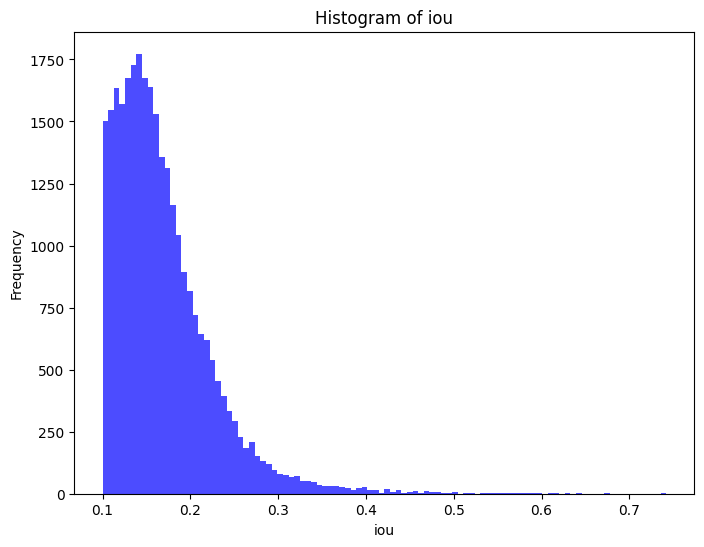

In [28]:
plt.figure(figsize=(8, 6))

plt.hist(data_filter['iou'], bins=100, color='blue', alpha=0.7)

plt.xlabel('iou')

plt.ylabel('Frequency')

plt.title('Histogram of iou')

plt.show()

El bin con más votos tiene un rango de (0.13852323504601582, 0.14494366611195028) con 1773 votos.


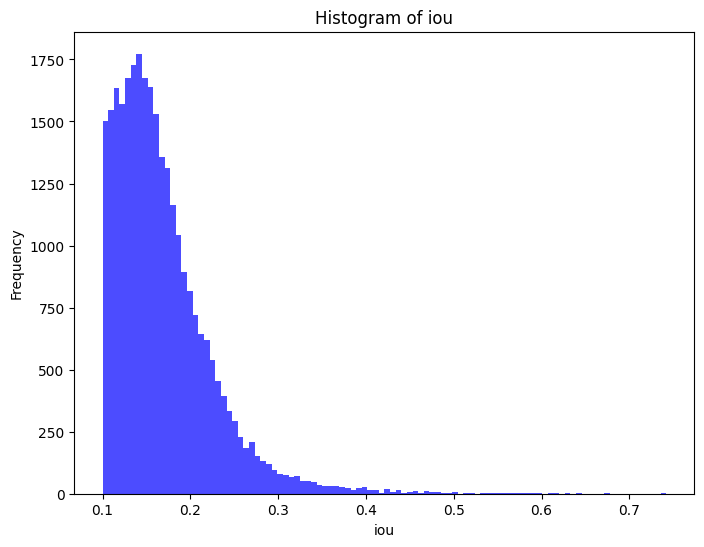

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza data_filter['iou'] con tus datos reales)
data = data_filter['iou']

# Calcular el histograma
counts, bins = np.histogram(data, bins=100)

# Encontrar el índice del bin con la mayor cantidad de votos
max_bin_index = np.argmax(counts)
max_bin_count = counts[max_bin_index]
max_bin_range = (bins[max_bin_index], bins[max_bin_index + 1])

# Imprimir el bin con más votos
print(f'El bin con más votos tiene un rango de {max_bin_range} con {max_bin_count} votos.')

# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(data, bins=100, color='blue', alpha=0.7)
plt.xlabel('iou')
plt.ylabel('Frequency')
plt.title('Histogram of iou')
plt.show()


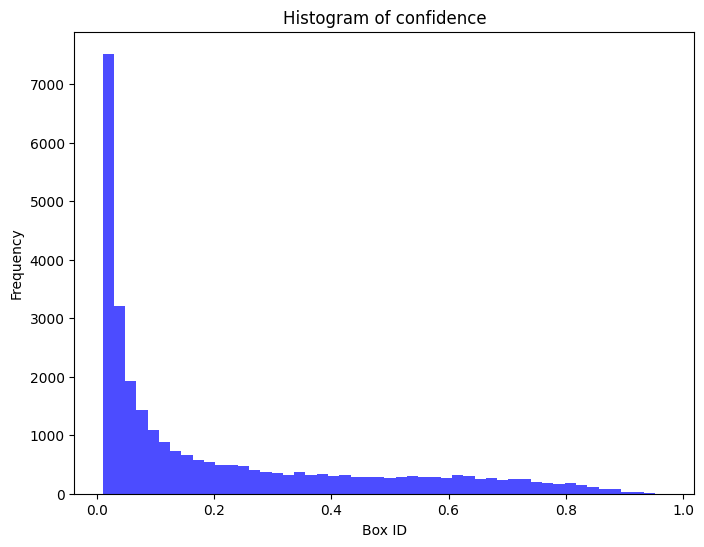

In [26]:
plt.figure(figsize=(8, 6))

plt.hist(data_filter['confidence'], bins=50, color='blue', alpha=0.7)

plt.xlabel('Box ID')

plt.ylabel('Frequency')

plt.title('Histogram of confidence')

plt.show()

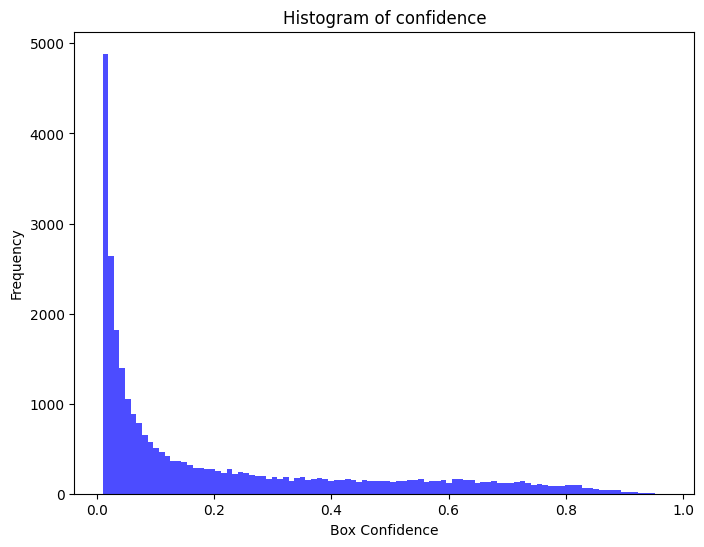

In [46]:
plt.figure(figsize=(8, 6))

plt.hist(data_filter['confidence'], bins=100, color='blue', alpha=0.7)

plt.xlabel('Box Confidence')

plt.ylabel('Frequency')

plt.title('Histogram of confidence')

plt.show()

In [47]:
data_filter[data_filter['confidence'] > 0.05]
# videos distintos
print(len(data_filter[data_filter['confidence'] > 0.2]['frame'].unique()))

8807
